<a href="https://colab.research.google.com/github/MrLuksR/Clasificacion-Modelo-de-Prediccion-de-Cancer-de-Mama/blob/main/Copia_de_Clasificaci%C3%B3n_C%C3%A1ncer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizaje supervisado - Clasificación con K-NN

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

### Dataset

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Información adicional.
`df['diagnosis'].replace({'B': 0, 'M': 1})`

# **Importación del archivo**

In [18]:
df = pd.read_csv('data.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **Mapa de calor para determinar variables con más influencia en el diagnóstico**

/tmp/ipython-input-1422966066.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)
/tmp/ipython-input-1422966066.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)


<Axes: >

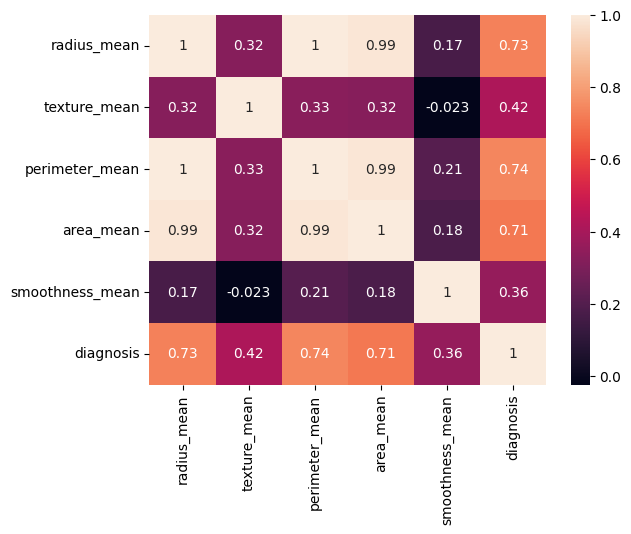

In [19]:
import matplotlib.pyplot as plt
import seaborn as sb

df['diagnosis'].replace({'B': 0, 'M': 1}, inplace=True)
cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
sb.heatmap(df[cols].corr(), annot=True)

## **Entrenamiento del modelo K-Nearest Neighbors**

In [20]:
X = df[['perimeter_mean', 'radius_mean', 'area_mean']]
Y = df[['diagnosis']]

sc = StandardScaler()
XScaled = sc.fit_transform(X)

kn = KNeighborsClassifier(n_neighbors = 5)
kn.fit(XScaled, Y)
df.head()

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **Valores manuales para predicción del diagnóstico**

In [21]:
input = [[128.80, 17.99, 1203]]
inputScaler = sc.transform(input)
output = kn.predict(inputScaler)

if (output[0]):
  print("El tumor es maligno")
else:
  print("El tumor es benigno")

El tumor es maligno


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Matriz de Correlaciones entre algunas de las columnas.**

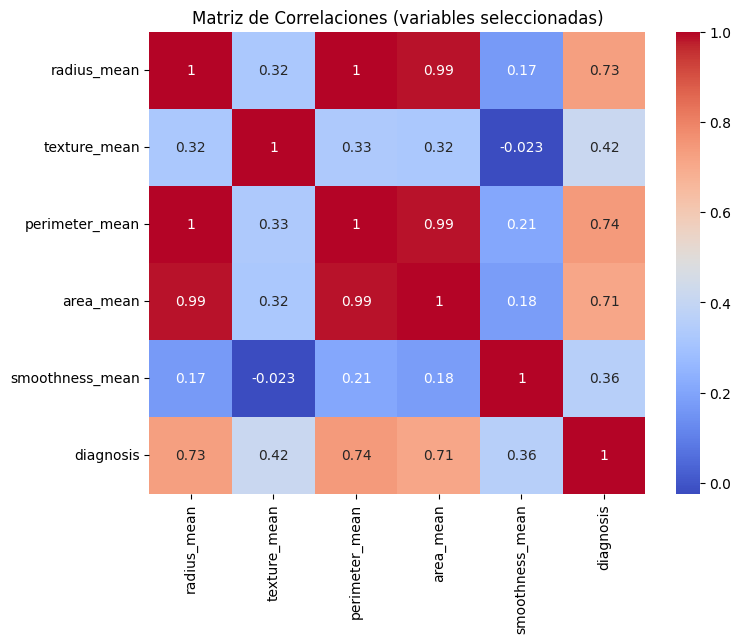

In [29]:
# Quedarse solo con las columnas seleccionadas
cols = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "diagnosis"]
df_small = df[cols].copy()

# Convertir diagnosis a numérico
#df_small["diagnosis_num"] = df_small["diagnosis"].map({"B":0, "M":1})

# Calcular correlación
corr_matrix = df_small.corr()

# Graficar matriz de correlaciones
plt.figure(figsize=(8, 6))
sb.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,  # mostrar valores numéricos
    cbar=True
)
plt.title("Matriz de Correlaciones (variables seleccionadas)")
plt.show()